In [1]:
!pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
cp /content/drive/MyDrive/ColabNotebooks/Kaggle_API_Credentials/kaggle.json ~/.kaggle/kaggle.json

In [12]:
! chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:26<00:00, 70.1MB/s]
100% 2.70G/2.70G [00:26<00:00, 109MB/s] 


In [14]:
!unzip new-plant-diseases-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [17]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [33]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [34]:
model= Sequential()

In [35]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [36]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [37]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [38]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [39]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [40]:
model.add(Dropout(0.25))

In [41]:
model.add(Flatten())

In [42]:
model.add(Dense(units=1500,activation='relu'))

In [43]:
model.add(Dropout(0.4))

In [44]:
#OUTPUT LAYER
model.add(Dense(units=38,activation='softmax'))

In [45]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 159s 65ms/step - accuracy: 0.3733 - loss: 2.2499 - val_accuracy: 0.8300 - val_loss: 0.5459
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 184s 63ms/step - accuracy: 0.8273 - loss: 0.5499 - val_accuracy: 0.9123 - val_loss: 0.2702
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 59ms/step - accuracy: 0.9020 - loss: 0.3035 - val_accuracy: 0.9272 - val_loss: 0.2291
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 130s 59ms/step - accuracy: 0.9316 - loss: 0.2118 - val_accuracy: 0.9395 - val_loss: 0.1884
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 0.9516 - loss: 0.1490 - val_accuracy: 0.9379 - val_loss: 0.1892
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 59ms/step - accuracy: 0.9624 - loss: 0.1178 - val_accuracy: 0.9480 - val_loss: 0.1691
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 63ms/step - accuracy: 0.9678 - loss: 0.0976 - val_accuracy: 0.9532 - val_loss: 0.1476
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 63ms/step - accuracy: 

In [48]:
#Model Evaluation on Training Set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 58s 26ms/step - accuracy: 0.9934 - loss: 0.0207


In [49]:
print(train_loss,train_acc)

0.018785960972309113 0.9939113855361938


In [50]:
#Model Evaluation on Validation Set
valid_loss, valid_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9670 - loss: 0.1093


In [51]:
print(valid_loss, valid_acc)

0.105873242020607 0.9693261981010437


In [52]:
model.save('/content/drive/MyDrive/ColabNotebooks/plant_disease_model.h5')
model.save('plant_disease_model.h5')

In [53]:
model.save('/content/drive/MyDrive/ColabNotebooks/plant_disease_model.keras')
model.save('plant_disease_model.keras')

In [54]:
training_history.history

{'accuracy': [0.5760722756385803,
  0.8527491092681885,
  0.9123550653457642,
  0.9382032752037048,
  0.9553595781326294,
  0.965232253074646,
  0.9709510207176208,
  0.9757593274116516,
  0.9802546501159668,
  0.9805676341056824],
 'loss': [1.452640175819397,
  0.4653490483760834,
  0.269253671169281,
  0.19119004905223846,
  0.13688693940639496,
  0.10743503272533417,
  0.08850682526826859,
  0.07400866597890854,
  0.06188657134771347,
  0.057553812861442566],
 'val_accuracy': [0.8299567699432373,
  0.9123036861419678,
  0.927213728427887,
  0.9395060539245605,
  0.9378556609153748,
  0.9479854106903076,
  0.9532210230827332,
  0.9628955125808716,
  0.9647734761238098,
  0.9693261981010437],
 'val_loss': [0.5459277629852295,
  0.2701719403266907,
  0.22908362746238708,
  0.18841814994812012,
  0.18917056918144226,
  0.16907739639282227,
  0.147566020488739,
  0.11937224864959717,
  0.1209716796875,
  0.10587317496538162]}

In [59]:
#Recording History in Json
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history,f)

In [60]:
#Recording History in Json
import json
with open("/content/drive/MyDrive/ColabNotebooks/training_hist.json","w") as f:
  json.dump(training_history.history,f)

ACCURACY VISUALIZATION


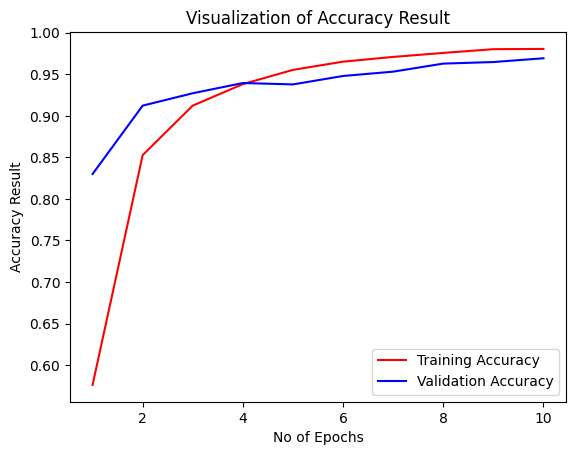

In [68]:
epochs = [i for i in range(1,11)]
epochs
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.title("Visualization of Accuracy Result")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.legend()
plt.show()

MODEL ACCURACY MATRICES

In [70]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [71]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [73]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step


(array([[1.00000000e+00, 5.24924415e-09, 8.45120360e-13, ...,
         1.60838438e-17, 5.17928784e-17, 1.53890682e-15],
        [9.99972105e-01, 1.25210772e-06, 3.47110340e-09, ...,
         1.11119725e-13, 1.28296516e-13, 4.37011972e-13],
        [1.00000000e+00, 7.96766120e-09, 1.64751665e-12, ...,
         3.39036662e-18, 7.38809400e-16, 4.31570131e-14],
        ...,
        [6.49773346e-10, 9.68559261e-12, 7.59672929e-08, ...,
         4.95124254e-11, 1.84513307e-11, 9.99966145e-01],
        [4.58132066e-09, 1.00485670e-11, 7.22474738e-08, ...,
         1.06835790e-10, 1.01306819e-11, 9.99998212e-01],
        [7.11429045e-21, 6.29012758e-23, 2.53428236e-19, ...,
         2.49885669e-21, 1.77689782e-19, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [74]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [75]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [76]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [81]:
#Precision, Recall, Accuracy
from sklearn.metrics import classification_report,confusion_matrix


In [80]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.97      0.96       504
                                 Apple___Black_rot       0.97      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.90      0.98      0.93       502
                               Blueberry___healthy       0.99      0.93      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.94      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

CONFUSION MATRIX

In [85]:
CM = confusion_matrix(y_true,predicted_categories)
CM.shape

(38, 38)

CONFUSION MATRIX VISUALIZATION


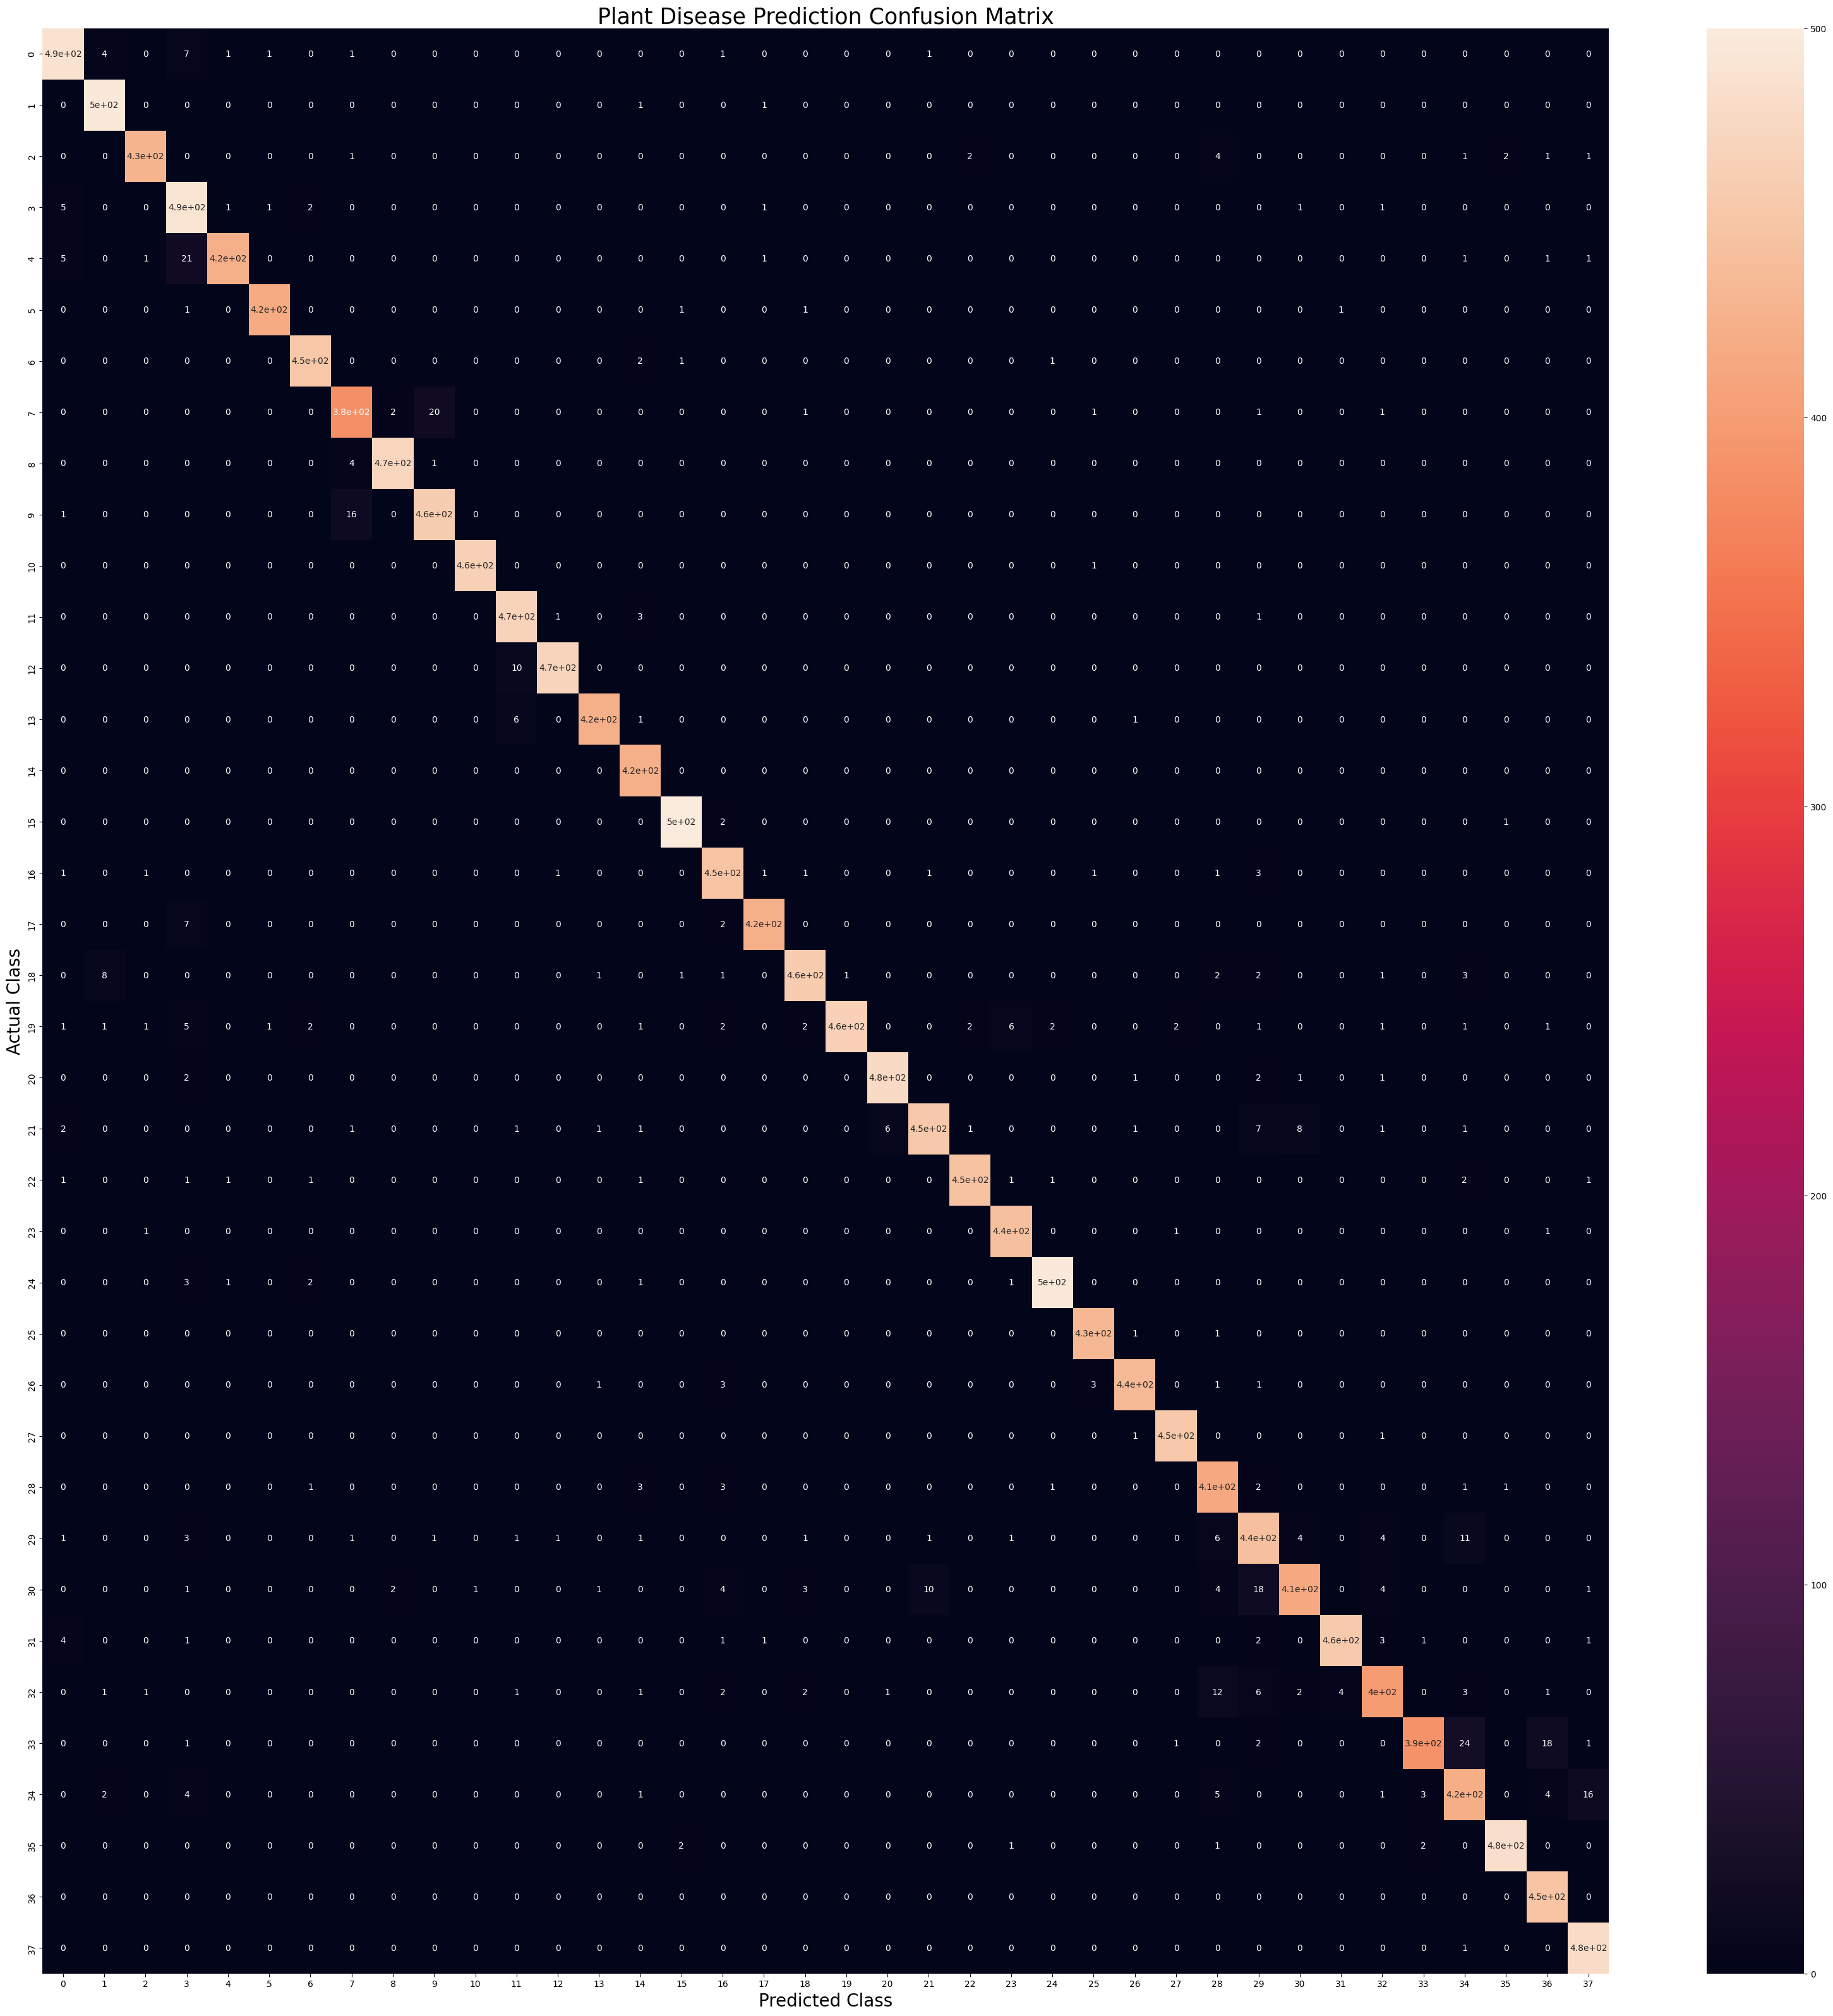

In [97]:
plt.figure(figsize=(40,40))
sns.heatmap(CM,annot=True,annot_kws={'size':10})
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.show()